In [1]:
#Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import squarify

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data from csv.file

crimes_data = pd.read_csv('Crimes_-_2017_to_2022.csv')

In [3]:
#Checking the data contents

crimes_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11614273,JC174951,01/01/2017 12:00:00 AM,018XX S CALIFORNIA AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,12.0,29.0,11,NaN,NaN,2017,03/06/2019 04:20:10 PM,NaN,NaN,NaN
1,11622471,JC184902,01/01/2017 12:00:00 AM,013XX S LAWNDALE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,24.0,29.0,11,NaN,NaN,2017,03/14/2019 04:07:17 PM,NaN,NaN,NaN
2,11255786,JB185271,01/01/2017 12:00:00 AM,045XX N HAZEL ST,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,COMMERCIAL / BUSINESS OFFICE,False,False,...,46.0,3.0,11,NaN,NaN,2017,03/15/2018 03:55:29 PM,NaN,NaN,NaN
3,11259747,JB190580,01/01/2017 12:00:00 AM,038XX W ARMITAGE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,26.0,22.0,11,NaN,NaN,2017,03/19/2018 04:13:18 PM,NaN,NaN,NaN
4,11267468,JB195629,01/01/2017 12:00:00 AM,017XX W HENDERSON ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,47.0,6.0,17,NaN,NaN,2017,08/23/2019 03:57:55 PM,NaN,NaN,NaN


In [4]:
#Handling any inconsistensis of column names

crimes_data.columns = crimes_data.columns.str.strip()
crimes_data.columns = crimes_data.columns.str.replace(',', '')
crimes_data.columns = crimes_data.columns.str.replace(' ', '_')
crimes_data.columns = crimes_data.columns.str.lower()

In [5]:
# Data shape - in raw data

crimes_data.shape

(1413406, 22)

In [6]:
# Data size - in raw data

crimes_data.size

31094932

In [7]:
#Checking the data for any null values and its datatypes

crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413406 entries, 0 to 1413405
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1413406 non-null  int64  
 1   case_number           1413406 non-null  object 
 2   date                  1413406 non-null  object 
 3   block                 1413406 non-null  object 
 4   iucr                  1413406 non-null  object 
 5   primary_type          1413406 non-null  object 
 6   description           1413406 non-null  object 
 7   location_description  1407133 non-null  object 
 8   arrest                1413406 non-null  bool   
 9   domestic              1413406 non-null  bool   
 10  beat                  1413406 non-null  int64  
 11  district              1413405 non-null  float64
 12  ward                  1413356 non-null  float64
 13  community_area        1413405 non-null  float64
 14  fbi_code              1413406 non-

In [8]:
#Check the data forany duplicates

crimes_data[crimes_data.duplicated(keep=False)]

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location


In [9]:
# Removing Primary key type attriburtes as they of no use for any type of analysis, Location columns is just a 
# combination of Latitude and Longitude

crimes_data.drop(['id','case_number','block','iucr','beat','ward','community_area','fbi_code','x_coordinate',\
                  'y_coordinate','updated_on','location'],axis=1,inplace=True)

In [10]:
# EDA - checking no of null data points in the dataset.

crimes_data.isnull().sum()

date                        0
primary_type                0
description                 0
location_description     6273
arrest                      0
domestic                    0
district                    1
year                        0
latitude                21121
longitude               21121
dtype: int64

In [11]:
# Analyzing null data:
# A. for location_description, most are attributed to "Deceptive Practice" Crime type.These represent financial frauds type which are location agnostic in nature
# B. Other categories are close to zero, and immaterial compared to total dataset. Hence we continue to include.


crimes_data[crimes_data['location_description'].isnull()].pivot_table(index=['primary_type','description'],
                        values='district',
                        aggfunc=len, fill_value=0)

district
primary_type            description                                      
ARSON                   BY FIRE                                         1
BATTERY                 AGGRAVATED - HANDGUN                            1
BURGLARY                FORCIBLE ENTRY                                  2
CRIMINAL SEXUAL ASSAULT NON-AGGRAVATED                                  2
DECEPTIVE PRACTICE      AGGRAVATED FINANCIAL IDENTITY THEFT             2
                        BOGUS CHECK                                     3
                        COMPUTER FRAUD                                  8
                        COUNTERFEIT CHECK                               3
                        COUNTERFEITING DOCUMENT                         3
                        CREDIT CARD FRAUD                              32
                        FINANCIAL IDENTITY THEFT $300 AND UNDER      1034
                        FINANCIAL IDENTITY THEFT OVER $ 300          5099
                        FORGERY                                         5
                        FRAUD OR CONFIDENCE GAME                       40
                        ILLEGAL POSSESSION CASH CARD                    1
                        ILLEGAL USE CASH CARD                          22
                        UNLAWFUL USE OF A COMPUTER                      6
OTHER OFFENSE           OTHER CRIME AGAINST PERSON                      1
THEFT                   $500 AND UNDER                                  3
                        OVER $500                                       3
                        POCKET-PICKING                                  1
                        RETAIL THEFT                                    1

In [12]:
# Data shape - after EDA

crimes_data.shape

(1413406, 10)

In [13]:
# Data size - after EDA

crimes_data.size

14134060

In [14]:
# Summary Table - Annual Crime count

crimes_data.groupby('year')['year'].count()

year
2017    269007
2018    268689
2019    261150
2020    211937
2021    207957
2022    194666
Name: year, dtype: int64

In [15]:
# Converting the data column to datetime object so we can get better results of our analysis
# Get the day of the week,month and time of the crimes

crimes_data.date = pd.to_datetime(crimes_data.date)
crimes_data['day_of_week'] = crimes_data.date.dt.day_name()
crimes_data['month'] = crimes_data.date.dt.month_name()
crimes_data['time'] = crimes_data.date.dt.hour
crimes_data['time'] = crimes_data.date.dt.hour

In [16]:
# 2022 Crime data set - we start with analysis of latest time period

crimes_data_2022 = crimes_data.loc[crimes_data['year']== 2022]

In [17]:
# Breakdown of Crime Type in Percentage format. It is a long list with only major 12 Crime Types 
# when a threshold of 1% is applied

crimes_data_2022.groupby(['primary_type']).agg({"year" : "count"})\
.apply(lambda x: 100*x/x.sum()).round(2).sort_values(by="year", ascending=False)

,year
primary_type,
THEFT,23.21
BATTERY,17.77
CRIMINAL DAMAGE,11.49
ASSAULT,8.97
MOTOR VEHICLE THEFT,8.03
DECEPTIVE PRACTICE,6.37
OTHER OFFENSE,6.26
WEAPONS VIOLATION,3.88
ROBBERY,3.70


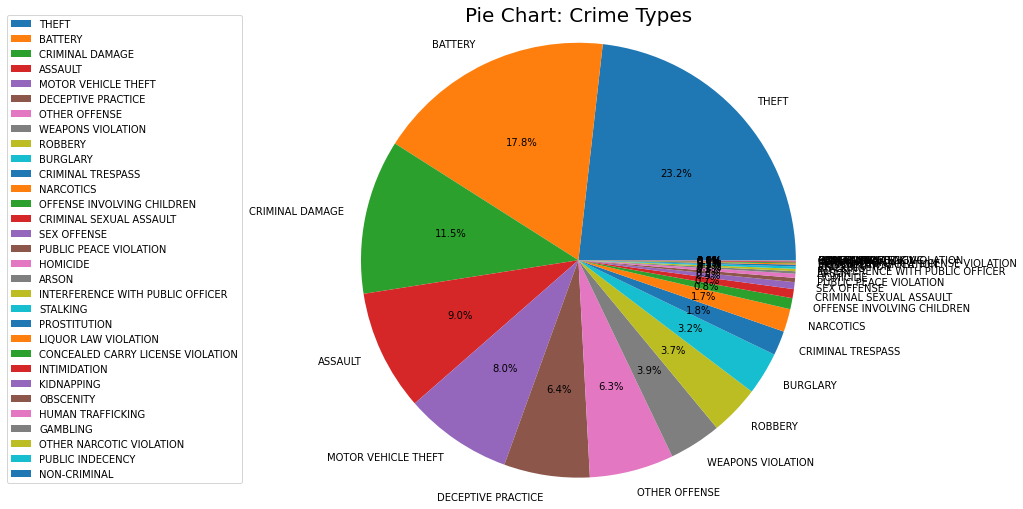

In [18]:
# Pie chart - Crime Type: It includes all the Crime Types but as seen it is a poor visualization 
# due to large no of CrimeTypes which have a proportion < 1% 

plt.title('Pie Chart: Crime Types',fontsize=20,  pad= 130)
crimes_data_primary_type_pie = plt.pie(crimes_data_2022.primary_type.value_counts().values,labels=crimes_data_2022.primary_type.value_counts().index,autopct='%1.1f%%',radius=2.5)
plt.legend(bbox_to_anchor=(-2.15, 1.65), loc="upper left")

Text(0, 0.5, 'Crime Type')

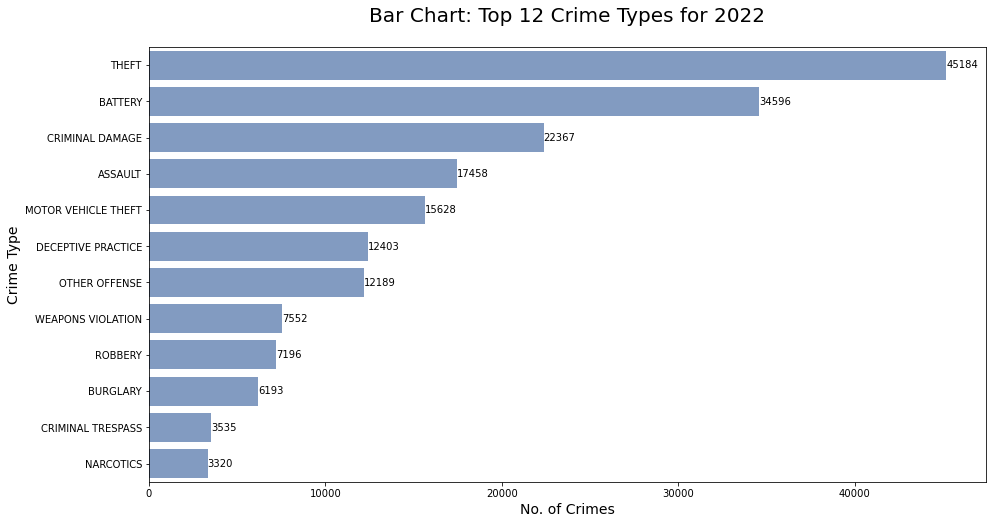

In [19]:
# Since there are many Crime Types with insignificant proportion in Total Data, we choose to vizualize applying
# Threshold of Crime Types >= 1.0% which are 12 in number

# Bar chart - Crime Type
plt.figure(figsize=(15,8))
primary_type_barplot = sns.barplot(data=crimes_data_2022,
                                     x=crimes_data_2022.primary_type.value_counts()[0:12].values,
                                     y=crimes_data_2022.primary_type.value_counts()[0:12].index,
                                     color = "#79C")
for i in primary_type_barplot.containers:
    primary_type_barplot.bar_label(i,)

plt.title('Bar Chart: Top 12 Crime Types for 2022', fontsize=20, pad = 25)
plt.xlabel('No. of Crimes', fontsize=14)
plt.ylabel('Crime Type', fontsize=14)

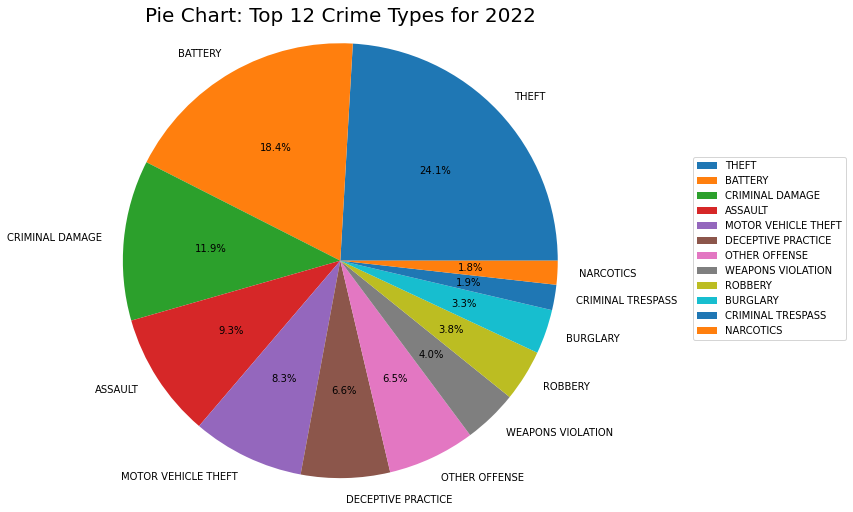

In [20]:
# Pie chart - Crime Type
# Percentages here are a bit off from the original dataset as we retain only Crime Types with proportion >= 1% 

plt.title('Pie Chart: Top 12 Crime Types for 2022',fontsize=20,  pad= 130)
crimes_data_primary_type_pie = plt.pie(crimes_data_2022.primary_type.value_counts()[0:12].values,labels=crimes_data_2022.primary_type.value_counts()[0:12].index,autopct='%1.1f%%',radius=2.5)
plt.legend(bbox_to_anchor=(2.1, 1), loc="upper left")

Text(0, 0.5, 'No. of Crimes')

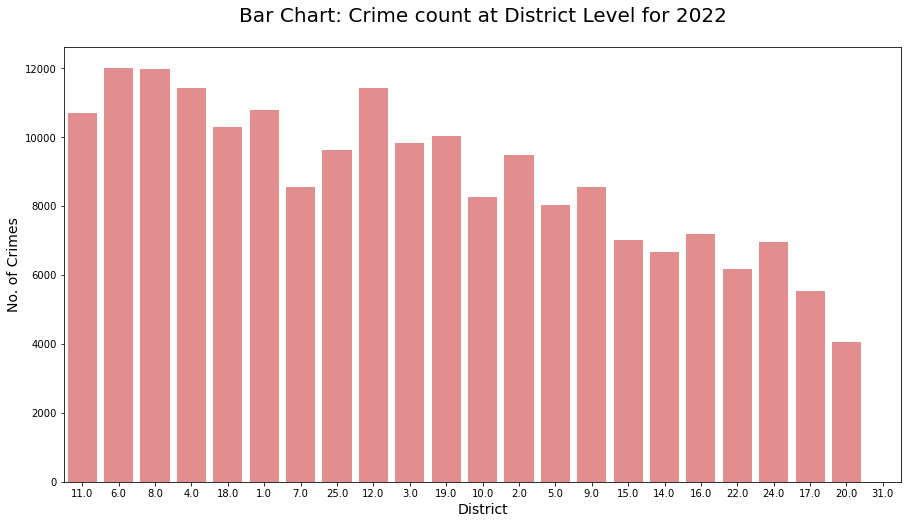

In [21]:
# Bar chart - Crime Type at District Level
# we see that District 6 and 8 have the hightest number of crimes

plt.figure(figsize=(15,8))

zone_plot = sns.countplot(data=crimes_data_2022,
                          x='district',
                          order=crimes_data.district.value_counts().round(2).index,color="lightcoral")

plt.title('Bar Chart: Crime count at District Level for 2022', fontsize=20, pad = 25)
plt.xlabel('District', fontsize=14)
plt.ylabel('No. of Crimes', fontsize=14)

Text(113.99999999999999, 0.5, 'Crime Type')

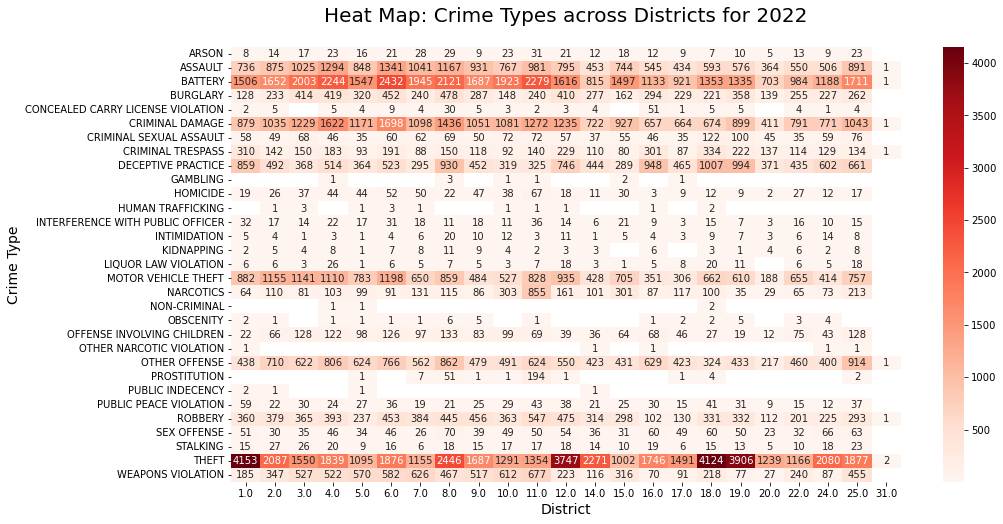

In [22]:
# Heat map = Crime Type vs District: Provides a holistic view of crimes across all Districts
# This visualization is easy to comprehend as the color intensity represents higher count

data_hm_district = crimes_data_2022
data_hm_district = data_hm_district.groupby(['primary_type','district'])['year'].count().unstack()
plt.figure(figsize=(15,8))
sns.heatmap(data_hm_district,cmap='Reds',annot = True, fmt='g')

plt.title('Heat Map: Crime Types across Districts for 2022', fontsize=20, pad = 25)
plt.xlabel('District', fontsize=14)
plt.ylabel('Crime Type', fontsize=14)

In [23]:
# Treemap = location description in 2022

data_treemap_loc_desc = crimes_data_2022
data_treemap_loc_desc = data_treemap_loc_desc.groupby(['location_description']).size().sort_values(ascending=False).rename("count").reset_index()
data_treemap_loc_desc.shape

(129, 2)

In [24]:
data_treemap_loc_desc['count'].sum()

194111

In [25]:
# taking top 15 locations which covers ~ 86% of count of crimes for clear visualization of Treemap
data_treemap_temp = data_treemap_loc_desc.head(15)
data_treemap_temp['count'].sum()

167118

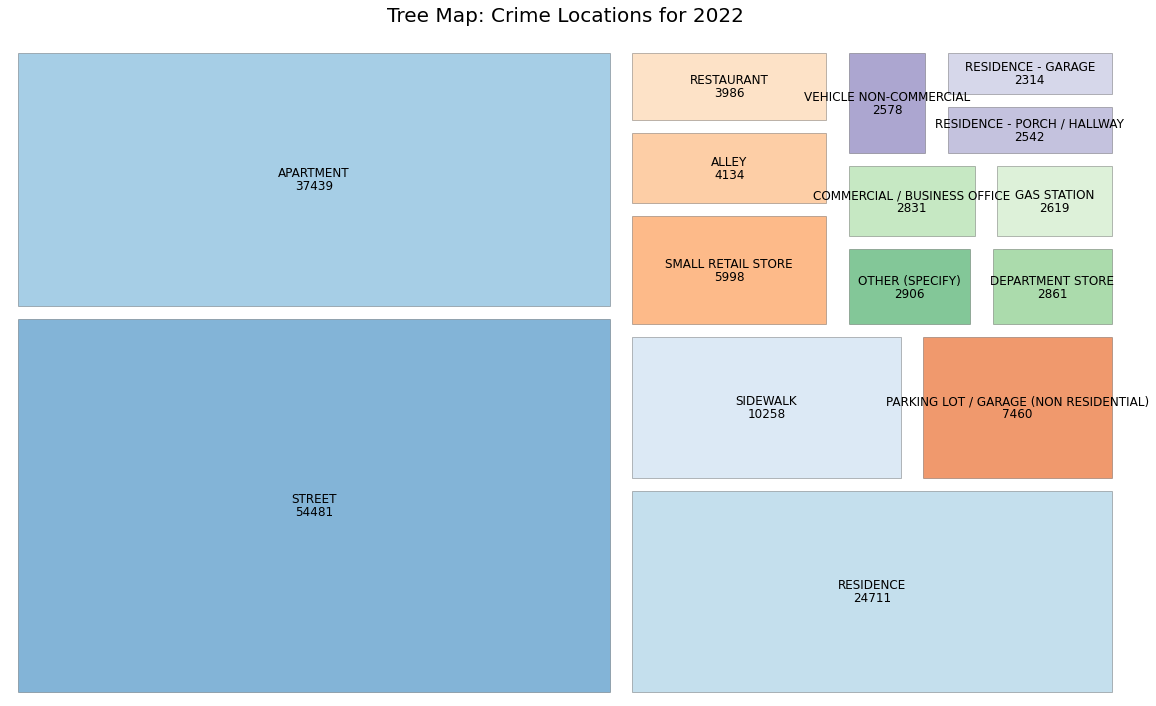

In [26]:
# Tre

#Utilise matplotlib to scale our crime count between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(data_treemap_temp['count']), vmax=max(data_treemap_temp['count']))
colors = [matplotlib.cm.GnBu(norm(value)) for value in data_treemap_temp['count']]

plt.figure(figsize=(20,12))
plt.rcParams['font.size'] = '12'
ax = squarify.plot(sizes=data_treemap_temp['count'], label=data_treemap_temp['location_description'],
                   value= data_treemap_temp['count'],
                   #color = colors,
                   color = plt.cm.tab20c.colors,
                   alpha=0.6, pad = True,
                   bar_kwargs=dict(linewidth=0.5, edgecolor="#222222"))

plt.title('Tree Map: Crime Locations for 2022', fontsize=20, pad = 25)
plt.axis('off')
plt.show()


Text(0, 0.5, 'No. of Crimes')

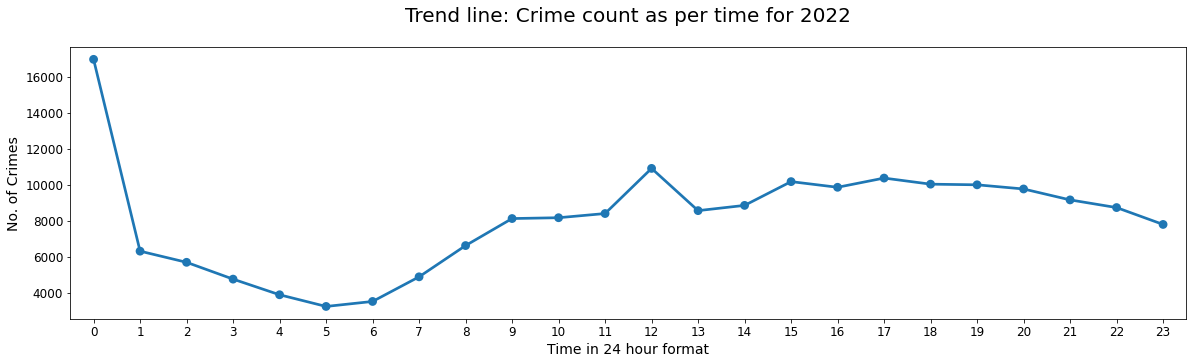

In [27]:
# Number of crimes at different time of the day
# From observation, we can deduce likelihood of Crime is highest at 12pm, remains considerably high between 3 to 8pm
# Even though Highest is at midnight / 0am, but this is unlikely a true indicator as it is not consistent with trend between 
# 11pm and 1am. Possibly, there is crime data with no time record
# Lowest crime instances between 4 to 6 am

plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=crimes_data_2022,x=crimes_data_2022.time.value_counts().index,y=crimes_data_2022.time.value_counts())
plt.title('Trend line: Crime count as per time for 2022', fontsize=20, pad = 25)
plt.xlabel('Time in 24 hour format', fontsize=14)
plt.ylabel('No. of Crimes', fontsize=14)

Text(0, 0.5, 'No. of Crimes')

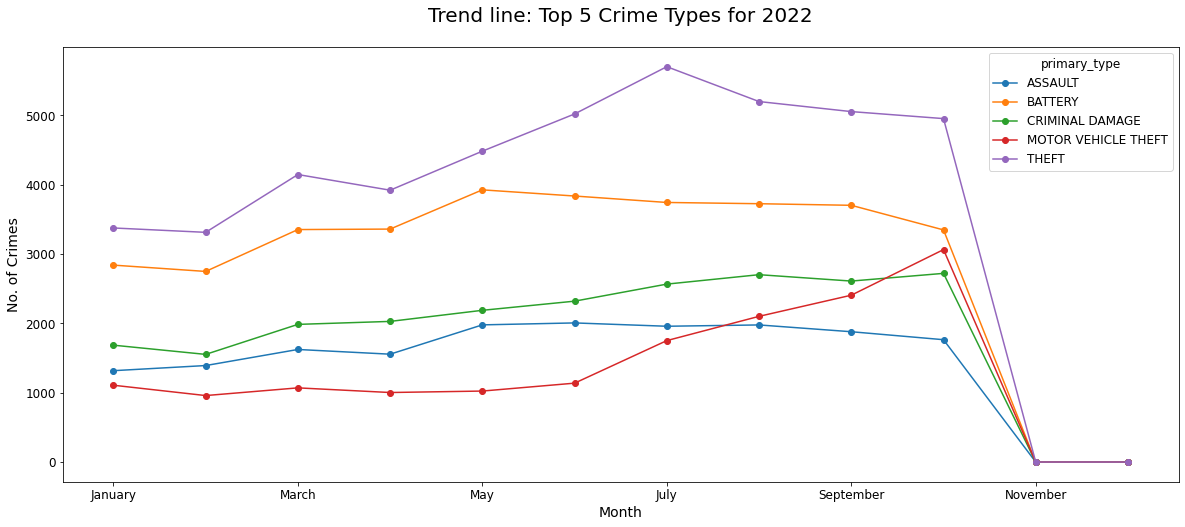

In [28]:
# Trend line - Monthly top 5 crimes in 2022
# We can see that Crimes increase during summer with a consistent rise from April to July and then taper off
# As expected, all the trend lines drop to zero as we limit our observations till 2022 Oct end 

c_list = ["BATTERY","THEFT","CRIMINAL DAMAGE","ASSAULT","MOTOR VEHICLE THEFT"]

crimes_data_2022_t5 = crimes_data_2022[crimes_data_2022["primary_type"].isin(c_list)]
crimes_data_2022_t5['month'] = pd.Categorical(crimes_data_2022_t5['month'], ['January','February','March','April','May','June','July','August','September','October','November','December'])
crimes_data_2022_t5.sort_values(['month'])

data_2022 = crimes_data_2022_t5.groupby(["month","primary_type"])['primary_type'].count().unstack()
data_2022.plot(marker='o',figsize=(20,8))

plt.title('Trend line: Top 5 Crime Types for 2022', fontsize=20, pad = 25)
plt.xlabel('Month', fontsize=14)
plt.ylabel('No. of Crimes', fontsize=14)

In [29]:
# Summary Table - Crime Type vs Annual breakdown from 2017
# This is not much useful as it contains only numbers but difficult to read thru
# It contains crime types which may have insignificant contribution

crimes_data.groupby(['primary_type','year'])['year'].count().unstack()

year,2017,2018,2019,2020,2021,2022
primary_type,,,,,,
ARSON,444.0,373.0,376.0,589.0,527.0,358.0
ASSAULT,19306.0,20406.0,20619.0,18254.0,20336.0,17458.0
BATTERY,49238.0,49827.0,49510.0,41506.0,40447.0,34596.0
BURGLARY,13001.0,11746.0,9639.0,8755.0,6658.0,6193.0
CONCEALED CARRY LICENSE VIOLATION,69.0,149.0,217.0,148.0,173.0,147.0
CRIM SEXUAL ASSAULT,1519.0,1412.0,916.0,75.0,NaN,NaN
CRIMINAL DAMAGE,29044.0,27823.0,26681.0,24877.0,25091.0,22367.0
CRIMINAL SEXUAL ASSAULT,155.0,295.0,725.0,1159.0,1488.0,1308.0
CRIMINAL TRESPASS,6814.0,6908.0,6818.0,4177.0,3406.0,3535.0


In [30]:
# same case with percentage format

crimes_data.groupby(['primary_type','year']).agg({"description" : "count"})\
.apply(lambda x: 100*x/x.sum()).round(2).unstack()

description                              
year                                     2017  2018  2019  2020  2021  2022
primary_type                                                               
ARSON                                    0.03  0.03  0.03  0.04  0.04  0.03
ASSAULT                                  1.37  1.44  1.46  1.29  1.44  1.24
BATTERY                                  3.48  3.53  3.50  2.94  2.86  2.45
BURGLARY                                 0.92  0.83  0.68  0.62  0.47  0.44
CONCEALED CARRY LICENSE VIOLATION        0.00  0.01  0.02  0.01  0.01  0.01
CRIM SEXUAL ASSAULT                      0.11  0.10  0.06  0.01   NaN   NaN
CRIMINAL DAMAGE                          2.05  1.97  1.89  1.76  1.78  1.58
CRIMINAL SEXUAL ASSAULT                  0.01  0.02  0.05  0.08  0.11  0.09
CRIMINAL TRESPASS                        0.48  0.49  0.48  0.30  0.24  0.25
DECEPTIVE PRACTICE                       1.39  1.40  1.34  1.28  1.21  0.88
GAMBLING                                 0.01  0.01  0.01  0.00  0.00  0.00
HOMICIDE                                 0.05  0.04  0.04  0.06  0.06  0.04
HUMAN TRAFFICKING                        0.00  0.00  0.00  0.00  0.00  0.00
INTERFERENCE WITH PUBLIC OFFICER         0.08  0.09  0.11  0.05  0.02  0.02
INTIMIDATION                             0.01  0.01  0.01  0.01  0.01  0.01
KIDNAPPING                               0.01  0.01  0.01  0.01  0.01  0.01
LIQUOR LAW VIOLATION                     0.01  0.02  0.02  0.01  0.01  0.01
MOTOR VEHICLE THEFT                      0.81  0.71  0.64  0.70  0.75  1.11
NARCOTICS                                0.83  0.96  1.07  0.53  0.35  0.23
NON-CRIMINAL                             0.00  0.00  0.00  0.00  0.00  0.00
NON-CRIMINAL (SUBJECT SPECIFIED)         0.00  0.00   NaN   NaN   NaN   NaN
OBSCENITY                                0.01  0.01  0.00  0.00  0.00  0.00
OFFENSE INVOLVING CHILDREN               0.17  0.17  0.17  0.14  0.13  0.11
OTHER NARCOTIC VIOLATION                 0.00  0.00  0.00  0.00  0.00  0.00
OTHER OFFENSE                            1.22  1.22  1.19  0.89  0.98  0.86
PROSTITUTION                             0.05  0.05  0.05  0.02  0.01  0.02
PUBLIC INDECENCY                         0.00  0.00  0.00  0.00  0.00  0.00
PUBLIC PEACE VIOLATION                   0.11  0.10  0.11  0.09  0.04  0.04
RITUALISM                                 NaN   NaN   NaN  0.00   NaN   NaN
ROBBERY                                  0.84  0.68  0.57  0.56  0.56  0.51
SEX OFFENSE                              0.07  0.08  0.10  0.07  0.08  0.07
STALKING                                 0.01  0.01  0.02  0.01  0.03  0.02
THEFT                                    4.55  4.62  4.42  2.92  2.88  3.20
WEAPONS VIOLATION                        0.33  0.39  0.45  0.60  0.63  0.53

Text(110.99999999999999, 0.5, 'Crime Type')

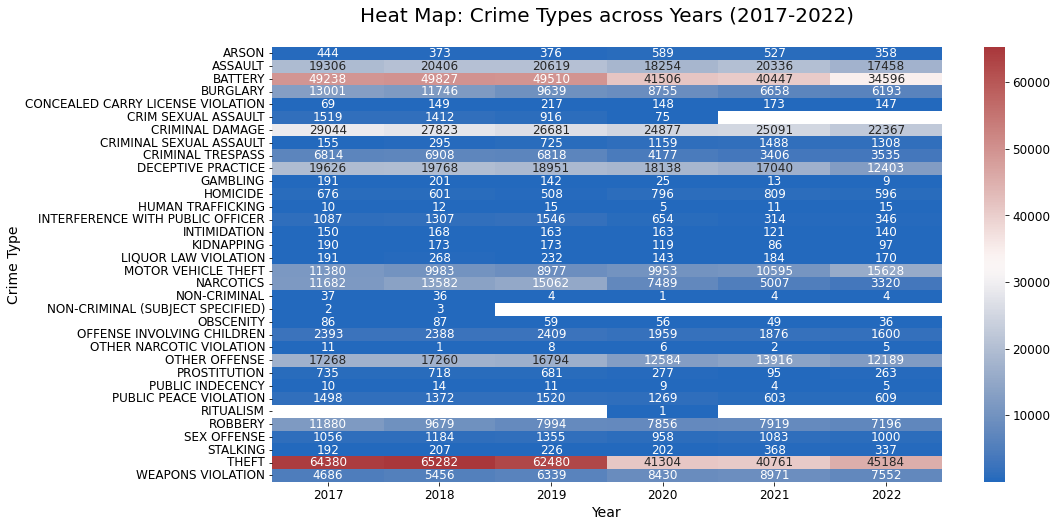

In [31]:
# Heat map = Crime Type vs Year: Provides a holistic view of crimes across all Districts
# This visualization is easy to comprehend as the color intensity represents higher count
# It helps to identify higher values, which have higher red hue
# Crime Types: Theft, Battery have decreased over period with highest drop in Battery from 49K to 35K

data_hm_annual = crimes_data
data_hm_annual = data_hm_annual.groupby(['primary_type','year'])['year'].count().unstack()
plt.figure(figsize=(15,8))
sns.heatmap(data_hm_annual,cmap='vlag',annot = True, fmt='g')

plt.title('Heat Map: Crime Types across Years (2017-2022)', fontsize=20, pad = 25)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Crime Type', fontsize=14)

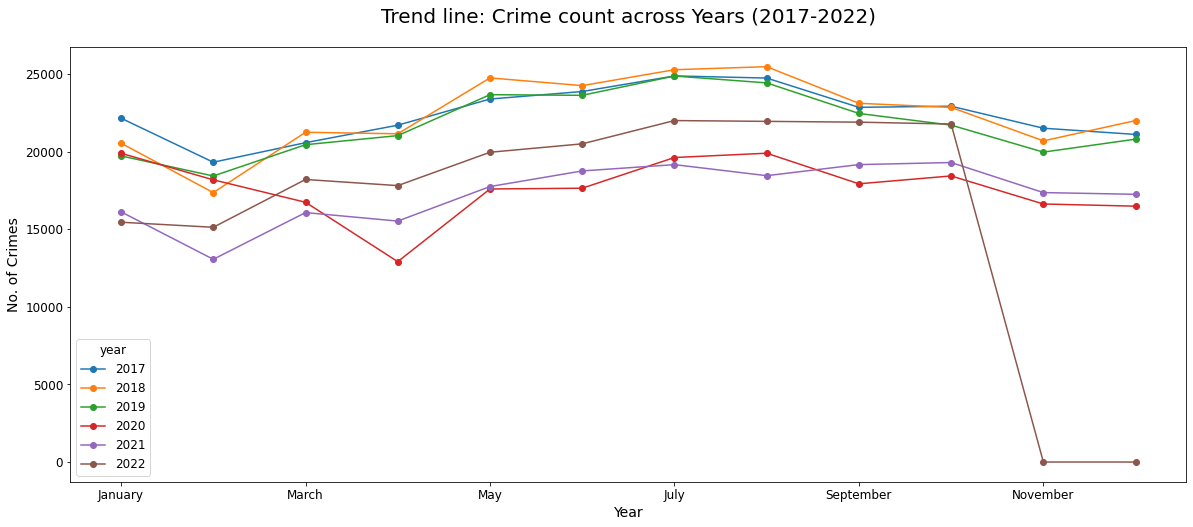

In [32]:
# YoY Trend line for Total Crime in Chicago across Years
# Trend line helps us to vizualize overall direction within a year and also across years
# as expected there is sharp fall in 2022 as November & Decemeber data is not included in this data set
# It also reveals that though Total No of crimes for 2022 are lower than previous years, it could be due to missing data
# for November and December. Crime is on rise as 2022 line is above both 2020 & 2021 ie Covid periods.

crimes_data_month_comp = crimes_data.copy()

crimes_data_month_comp['month'] = pd.Categorical(crimes_data_month_comp['month'], ['January','February','March','April','May','June','July','August','September','October','November','December'])

crimes_data_month_comp.sort_values(['month'])

data_full = crimes_data_month_comp.groupby(["month","year"])['year'].count().unstack()
data_full.plot(marker='o',figsize=(20,8))

plt.title('Trend line: Crime count across Years (2017-2022)', fontsize=20, pad = 25)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No. of Crimes', fontsize=14)

plt.show()

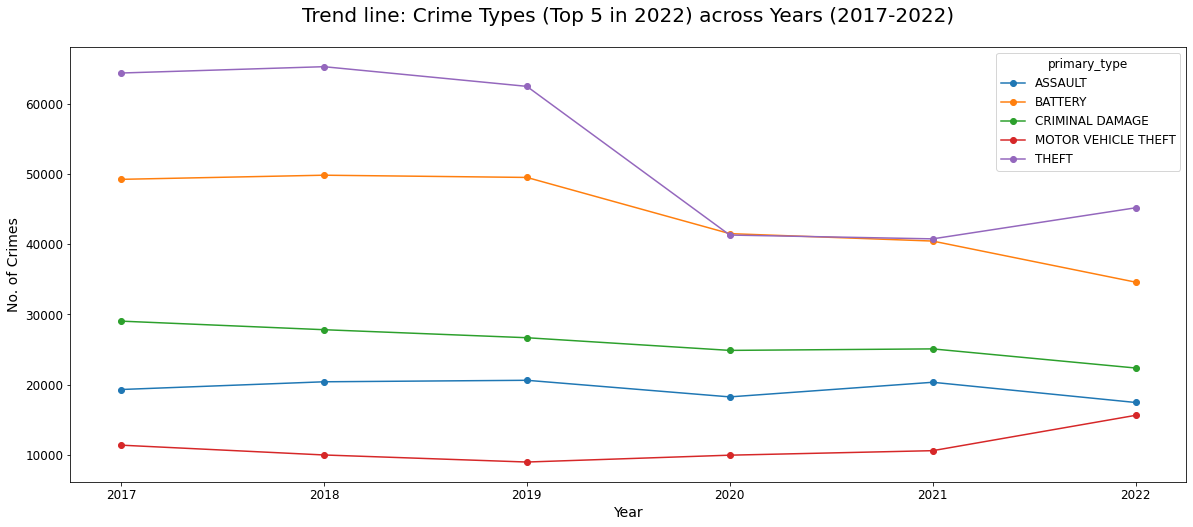

In [33]:
# YoY Trend line for top 5 crimes (as per 2022) in Chicago
# Observations: 2 crime types are quite stable
# Theft & Battery had a drop in 2020 & 2021 but Theft has upward slope in 9months of 2022. This can be attributed to
# people staying indoors during COVID period but stepping out as offices and public spaces open up. 
# Still it is well below 2019 period.
# Battery continues to decline consistently
# Surprisingly Motor Vehicle Theft is on the rise.

c_list = ["BATTERY","THEFT","CRIMINAL DAMAGE","ASSAULT","MOTOR VEHICLE THEFT"]

crimes_data_t5 = crimes_data[crimes_data["primary_type"].isin(c_list)]
crimes_data_t5['month'] = pd.Categorical(crimes_data_t5['month'], ['January','February','March','April','May','June','July','August','September','October','November','December'])
crimes_data_t5.sort_values(['month'])

data_full = crimes_data_t5.groupby(["year","primary_type"])['primary_type'].count().unstack()
data_full.plot(marker='o',figsize=(20,8))

plt.title('Trend line: Crime Types (Top 5 in 2022) across Years (2017-2022)', fontsize=20, pad = 25)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No. of Crimes', fontsize=14)

plt.show()

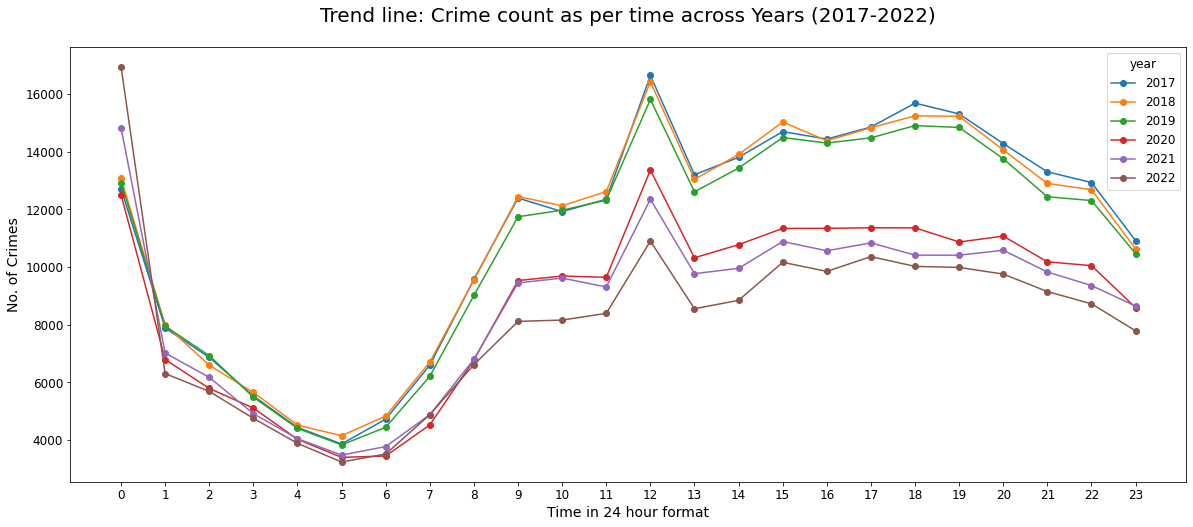

In [34]:
# YoY Trend line - Crimes at different time of the day
# We observe constistency across years, but the Total number of Crimes have decreased sequentially.
# Exception is 2022 - A much larger no of crimes have time stamp of 00 hours for 2022,this could be a reason 
# that the trend line is below Covid period of 2020 - 2021 and not in lien with 
# Trend line for Total Crime in Chicago across Years

data = crimes_data.groupby(["time","year"])['time'].count().unstack()
data.plot(marker='o',figsize=(20,8))
plt.xticks(np.arange(0, 24, 1))

plt.title('Trend line: Crime count as per time across Years (2017-2022)', fontsize=20, pad = 25)
plt.xlabel('Time in 24 hour format', fontsize=14)
plt.ylabel('No. of Crimes', fontsize=14)

plt.show()

In [35]:
# checking list of districts
crimes_data_2022['district'].unique()

array([ 4., 18.,  6., 25., 19., 11.,  7., 24., 22., 17.,  5.,  9., 12.,
       10.,  3.,  1., 16.,  8., 15., 20., 14.,  2., 31.])

In [36]:
# checking no of crimes in district '31'
crimes_data.loc[crimes_data['district']== 31].count()

date                    47
primary_type            47
description             47
location_description    47
arrest                  47
domestic                47
district                47
year                    47
latitude                47
longitude               47
day_of_week             47
month                   47
time                    47
dtype: int64